# Online Courses usage Data Analysis

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/kaggle/input/online-courses-usage-and-history-dataset/online_courses_uses.csv')

In [6]:
df.head()

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,2,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,3,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


In [7]:
df.shape

(10000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            10000 non-null  int64  
 1   Course_Name          10000 non-null  object 
 2   Category             10000 non-null  object 
 3   Duration (hours)     10000 non-null  int64  
 4   Enrolled_Students    10000 non-null  int64  
 5   Completion_Rate (%)  10000 non-null  float64
 6   Platform             10000 non-null  object 
 7   Price ($)            10000 non-null  float64
 8   Rating (out of 5)    10000 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 703.2+ KB


In [9]:
df.isnull().sum()

Course_ID              0
Course_Name            0
Category               0
Duration (hours)       0
Enrolled_Students      0
Completion_Rate (%)    0
Platform               0
Price ($)              0
Rating (out of 5)      0
dtype: int64

In [10]:
df[df.duplicated]

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)


In [11]:
df.describe()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.653000,75.119729,106.391332,3.994154
std,2886.89568,26.199242,1423.808243,14.462138,55.100685,0.575502
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.000000,62.629516,58.613731,3.490250
50%,5000.50000,55.000000,2532.000000,75.156568,108.042392,4.002789
75%,7500.25000,78.000000,3764.000000,87.595268,153.945558,4.483662
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


**Data PreProcessing**

In [12]:
df.columns

Index(['Course_ID', 'Course_Name', 'Category', 'Duration (hours)',
       'Enrolled_Students', 'Completion_Rate (%)', 'Platform', 'Price ($)',
       'Rating (out of 5)'],
      dtype='object')

In [13]:
df.rename(columns={
    'Course_ID': 'ID',
    'Course_Name': 'Name',
    'Duration (hours)': 'Duration',
    'Enrolled_Students': 'Students',
    'Completion_Rate (%)': 'Completion',
    'Platform': 'Platform',
    'Price ($)': 'Price',
    'Rating (out of 5)': 'Rating'
}, inplace=True)

In [15]:
df.drop('ID',axis = 1, inplace = True)

In [16]:
df.head()

,Name,Category,Duration,Students,Completion,Platform,Price,Rating
0,Course_1,Office Tools,21,4217,50.646827,Coursera,38.797425,4.811252
1,Course_2,Office Tools,57,4238,82.240240,edX,160.650991,3.829329
2,Course_3,Technology,52,2700,55.729028,LinkedIn Learning,123.503781,4.851950
3,Course_4,Office Tools,69,4308,58.664729,LinkedIn Learning,116.775704,3.913732
4,Course_5,Technology,43,4792,62.598147,Udemy,96.246696,4.921968


# Visualization

**Average Duration**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Duration', ylabel='Count'>

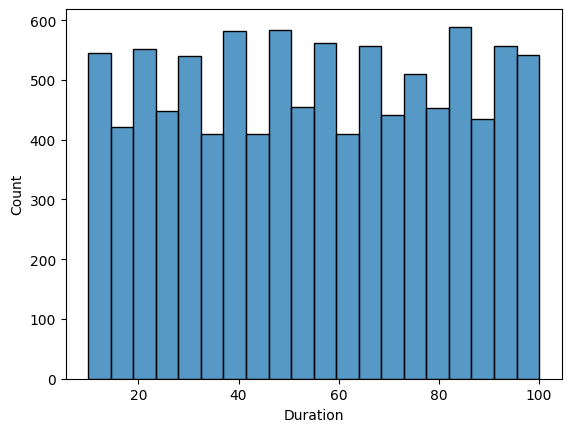

In [22]:
sns.histplot(x = 'Duration', data = df, bins = 20)

**Course Distribution category wise**

Text(0, 0.5, '')

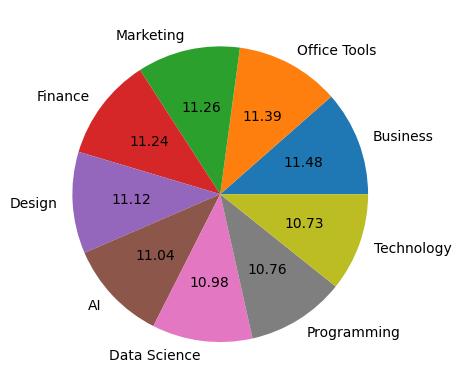

In [30]:
df['Category'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.ylabel(None)

**Students Enrollment**

In [36]:
df_std = df.groupby('Category')['Students'].sum().sort_values( ascending = False)

<Axes: xlabel='Category'>

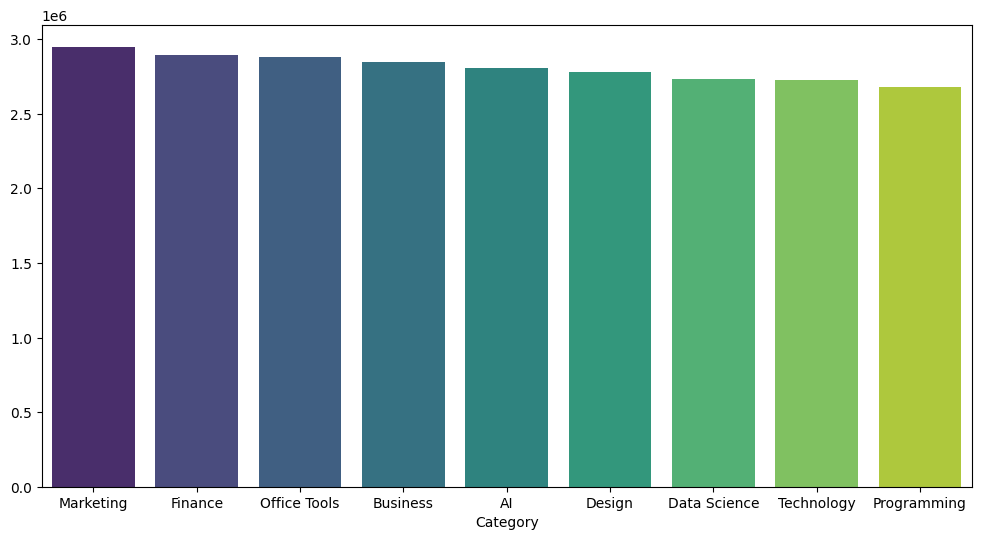

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x = df_std.index, y = df_std.values, palette = 'viridis')

**Completion Rate**

<Axes: xlabel='Category', ylabel='Completion'>

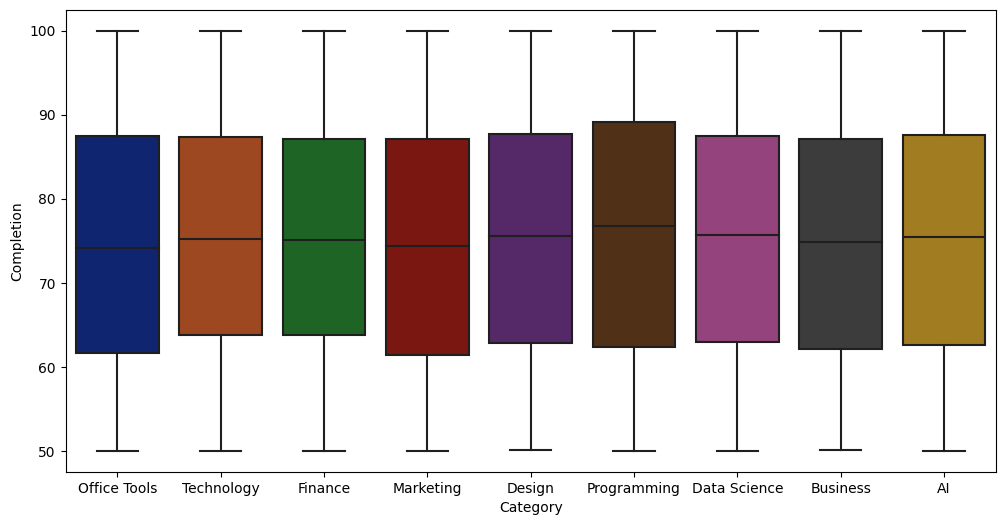

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Category', y = 'Completion', data = df, palette = 'dark')

**Avg Course Price**

1. Category Wise

Text(0, 0.5, '')

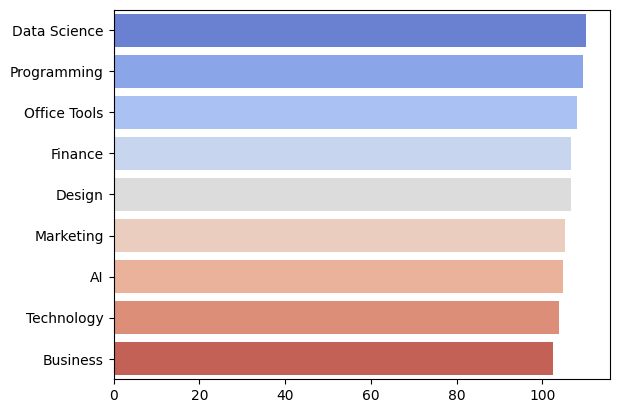

In [55]:
df_price = df.groupby('Category')['Price'].mean().sort_values(ascending = False)
sns.barplot(x = df_price.values, y = df_price.index, palette = 'coolwarm')
plt.ylabel(None)

2. Platform Wise

<Axes: xlabel='Platform'>

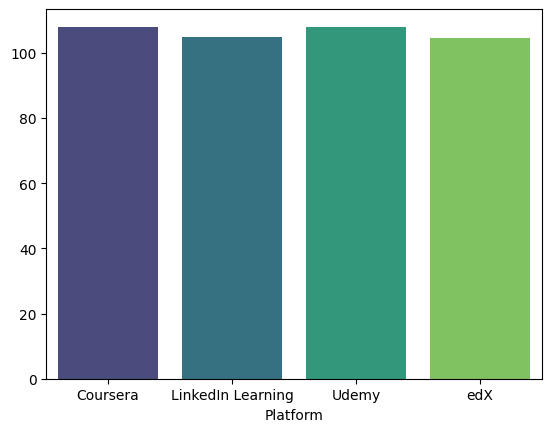

In [57]:
df2 = df.groupby('Platform')['Price'].mean()
sns.barplot(x = df2.index, y = df2.values, palette = 'viridis')

**Platform Wise Course Count**

<Axes: xlabel='Platform'>

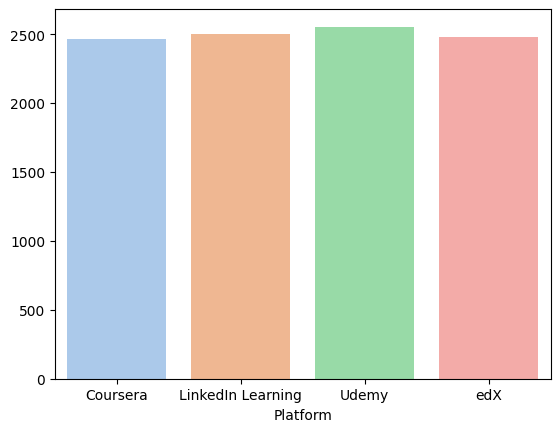

In [60]:
df3 = df.groupby('Platform')['Name'].count()
sns.barplot(x = df3.index, y = df3.values, palette = 'pastel')

# Linear Relationship

**Correlation & Heatmap**

In [64]:
df_num = df.select_dtypes(exclude=['object'])

<Axes: >

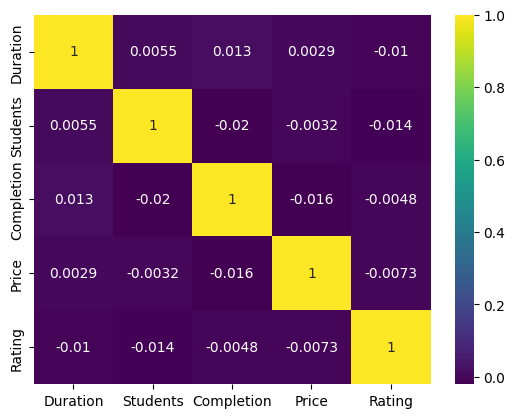

In [66]:
sns.heatmap(df_num.corr(), annot = True , cmap = 'viridis')

Negligable relationship among attributes

**Scatterplot**

<Axes: xlabel='Price', ylabel='Rating'>

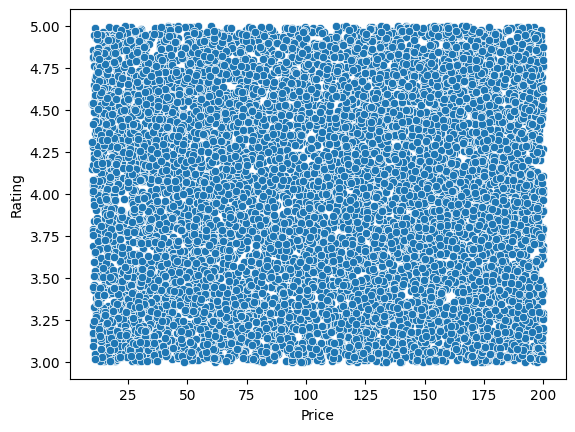

In [68]:
sns.scatterplot(x = 'Price', y = 'Rating', data = df)

No visible relationship

**Platform wise Enrolled Students**

In [69]:
df_plt = df.groupby('Platform')['Students'].sum()

Text(0, 0.5, '')

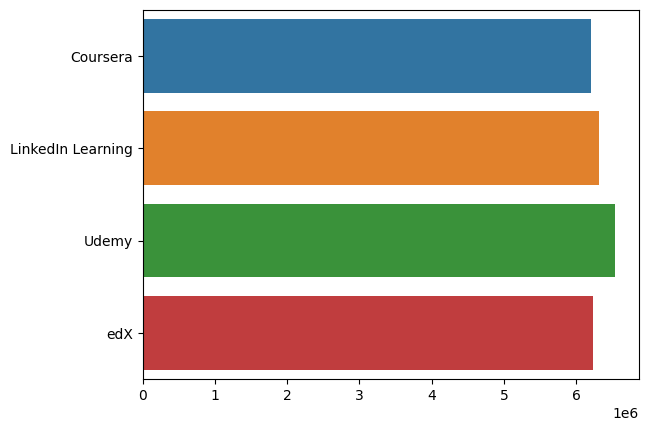

In [71]:
sns.barplot(x = df_plt.values, y = df_plt.index)
plt.ylabel(None)